E-Commerce Shipping data

Dataset is from Kaggle
Kaggle: https://www.kaggle.com/datasets/prachi13/customer-analytics

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [47]:
df = pd.read_csv('shipping/train.csv')

In [48]:
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [49]:
# Check null values 
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [50]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [52]:
# Identify target variable
df["Reached.on.Time_Y.N"].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

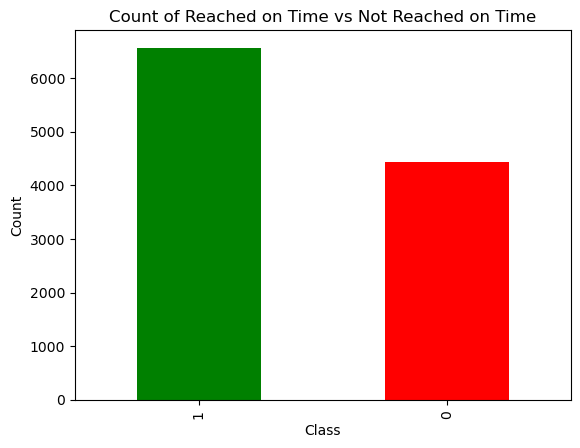

In [18]:
# Bar chart
df['Reached.on.Time_Y.N'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Count of Reached on Time vs Not Reached on Time')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Data Pre-processing 

In [ ]:
# one hot encoding

df = pd.get_dummies(df, columns=["Warehouse_block","Mode_of_Shipment","Gender"], drop_first=True)

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Product_importance'] = le.fit_transform(df['Product_importance'])

Train test-split

In [23]:
X = df.drop("Reached.on.Time_Y.N", axis=1)  # Features (independent variables)
y = df["Reached.on.Time_Y.N"]               # Target (dependent variable)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

In [36]:
# check accuracy
from sklearn.metrics import accuracy_score

Score = (accuracy_score(y_test,y_pred)*100)

print(Score)

65.36363636363637


The logistic regression model  achieved an accuracy of 65.36% 

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[533, 362],
       [400, 905]])

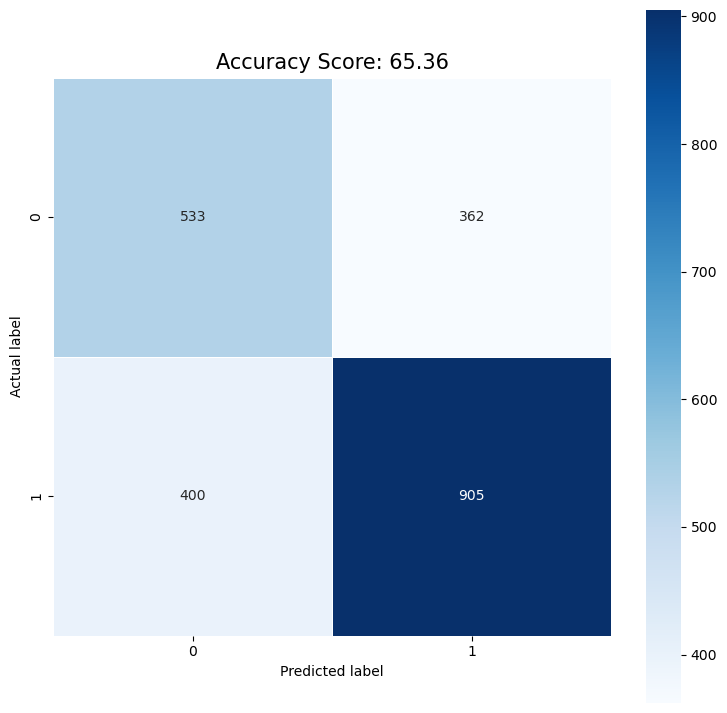

In [39]:

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0:.2f}'.format(Score), size = 15);



[TN, FP
 FN, TP]

 TN 533, The model was able to predict 533 late shipments.
 FP 362, The model wrongly predicted 362  shipments as on time. 
 FN 400, Wrongly predicted that 400 shipments were going to be late. 
 TP 905, Correctley predicted that the shipments were going to be on time. 



